<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/Loan_APPROVAL_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/playground-series-s4e10')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdulraheem09
Your Kaggle Key: ··········


100%|██████████| 1.45M/1.45M [00:00<00:00, 81.1MB/s]


Extracting archive ./playground-series-s4e10/playground-series-s4e10.zip to ./playground-series-s4e10


In [ ]:
train_df = pd.read_csv('/content/playground-series-s4e10/train.csv')
train_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [ ]:
test_df =pd.read_csv('/content/playground-series-s4e10/test.csv')
test_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [ ]:
submission_df =pd.read_csv('/content/playground-series-s4e10/sample_submission.csv')
submission_df

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5
...,...,...
39093,97738,0.5
39094,97739,0.5
39095,97740,0.5
39096,97741,0.5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df ,val_df = train_test_split(train_df,test_size=0.2,random_state=42)

In [ ]:
len(train_df) ,len(val_df)

(46916, 11729)

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col ='loan_status'

In [ ]:
train_inputs =train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [ ]:
val_inputs =val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categoric_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [ ]:
print(categoric_cols)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


# Imputing missing values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(train_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols].isna().sum()

,0
person_age,0
person_income,0
person_emp_length,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0


# Scaling Numeric Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
test_inputs.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,0.073464,0.031575,0.038106,0.253666,0.297121,0.192257,0.136811
std,0.058570,0.020021,0.031450,0.161631,0.171214,0.110402,0.145434
min,0.000000,-0.000105,0.000000,0.005797,0.000000,0.000000,0.000000
25%,0.029126,0.019939,0.016260,0.130435,0.139456,0.108434,0.035714
50%,0.058252,0.028379,0.032520,0.217391,0.302154,0.168675,0.071429
75%,0.097087,0.037813,0.056911,0.333333,0.429138,0.253012,0.214286
max,0.718447,1.000000,0.341463,1.000000,0.946145,0.879518,1.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output =False ,handle_unknown='ignore').fit(train_df[categoric_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categoric_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoric_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoric_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoric_cols])

In [ ]:
val_inputs

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
4657,0.029126,0.018884,RENT,0.000000,MEDICAL,A,0.092754,0.146259,0.108434,N,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56440,0.048544,0.029433,MORTGAGE,0.073171,HOMEIMPROVEMENT,A,0.130435,0.179705,0.096386,N,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42117,0.116505,0.032757,RENT,0.000000,MEDICAL,B,0.565217,0.403061,0.313253,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10849,0.019417,0.013609,RENT,0.000000,DEBTCONSOLIDATION,B,0.130435,0.293084,0.204819,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39395,0.067961,0.029433,RENT,0.008130,MEDICAL,B,0.188406,0.384921,0.144578,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12934,0.009709,0.021521,OWN,0.000000,MEDICAL,B,0.159420,0.275510,0.156627,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39660,0.067961,0.021521,RENT,0.040650,VENTURE,B,0.275362,0.383220,0.265060,N,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28657,0.077670,0.025214,RENT,0.032520,MEDICAL,B,0.217391,0.366780,0.180723,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24735,0.067961,0.017829,RENT,0.089431,MEDICAL,B,0.188406,0.296485,0.216867,N,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.029126,0.034181,0.024390,0.710145,0.586168,0.433735,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.058252,0.048423,0.048780,0.275362,0.411565,0.120482,0.071429,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.058252,0.013609,0.040650,0.101449,0.667234,0.156627,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.126214,0.024159,0.032520,0.188406,0.197279,0.168675,0.178571,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.058252,0.051588,0.065041,0.420290,0.617914,0.180723,0.071429,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,0.019417,0.014242,0.016260,0.072464,0.280612,0.120482,0.071429,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39094,0.019417,0.023104,0.048780,0.188406,0.034580,0.180723,0.035714,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39095,0.300971,0.029433,0.000000,0.420290,0.118481,0.301205,0.821429,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39096,0.019417,0.016774,0.032520,0.391304,0.578231,0.469880,0.071429,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


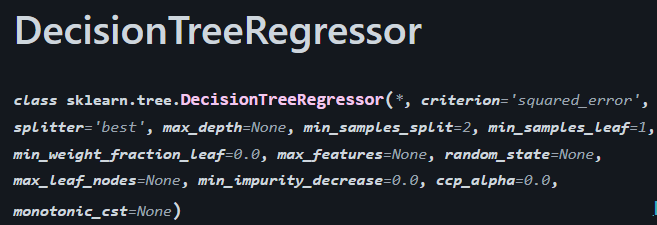

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(random_state=42)

In [ ]:
model.fit(X_train,train_target)

DecisionTreeRegressor(random_state=42)

An optimal decision tree has now been created using the training data.

# Evaluation
Let's evaluate the decision tree using the accuracy score.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

predictions

In [ ]:
train_pred = model.predict(X_train)
train_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
pd.value_counts(train_pred)

<ipython-input-37-d4eb306e0174>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_pred)


,count
0.0,40208
1.0,6708


In [ ]:
model.score(X_val, val_target)

0.2698964200251963

In [ ]:
model.score(X_train, train_target)

1.0

In [ ]:
from sklearn.metrics import mean_absolute_error

# Visualization
We can visualize the decision tree learned from the training data.

In [ ]:
from sklearn.tree import plot_tree ,export_text

[Text(0.5, 0.875, 'loan_percent_income <= 0.367\nsquared_error = 0.123\nsamples = 46916\nvalue = 0.143'),
 Text(0.25, 0.625, 'loan_grade_D <= 0.5\nsquared_error = 0.085\nsamples = 43150\nvalue = 0.094'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'loan_int_rate <= 0.599\nsquared_error = 0.051\nsamples = 39704\nvalue = 0.054'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'person_emp_length <= 0.02\nsquared_error = 0.247\nsamples = 3446\nvalue = 0.557'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'person_home_ownership_RENT <= 0.5\nsquared_error = 0.21\nsamples = 3766\nvalue = 0.7'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'loan_int_rate <= 0.507\nsquared_error = 0.122\nsamples = 1202\nvalue = 0.142'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'person_income <= 0.003\nsquared_error = 0.036\nsamples = 2564\nva

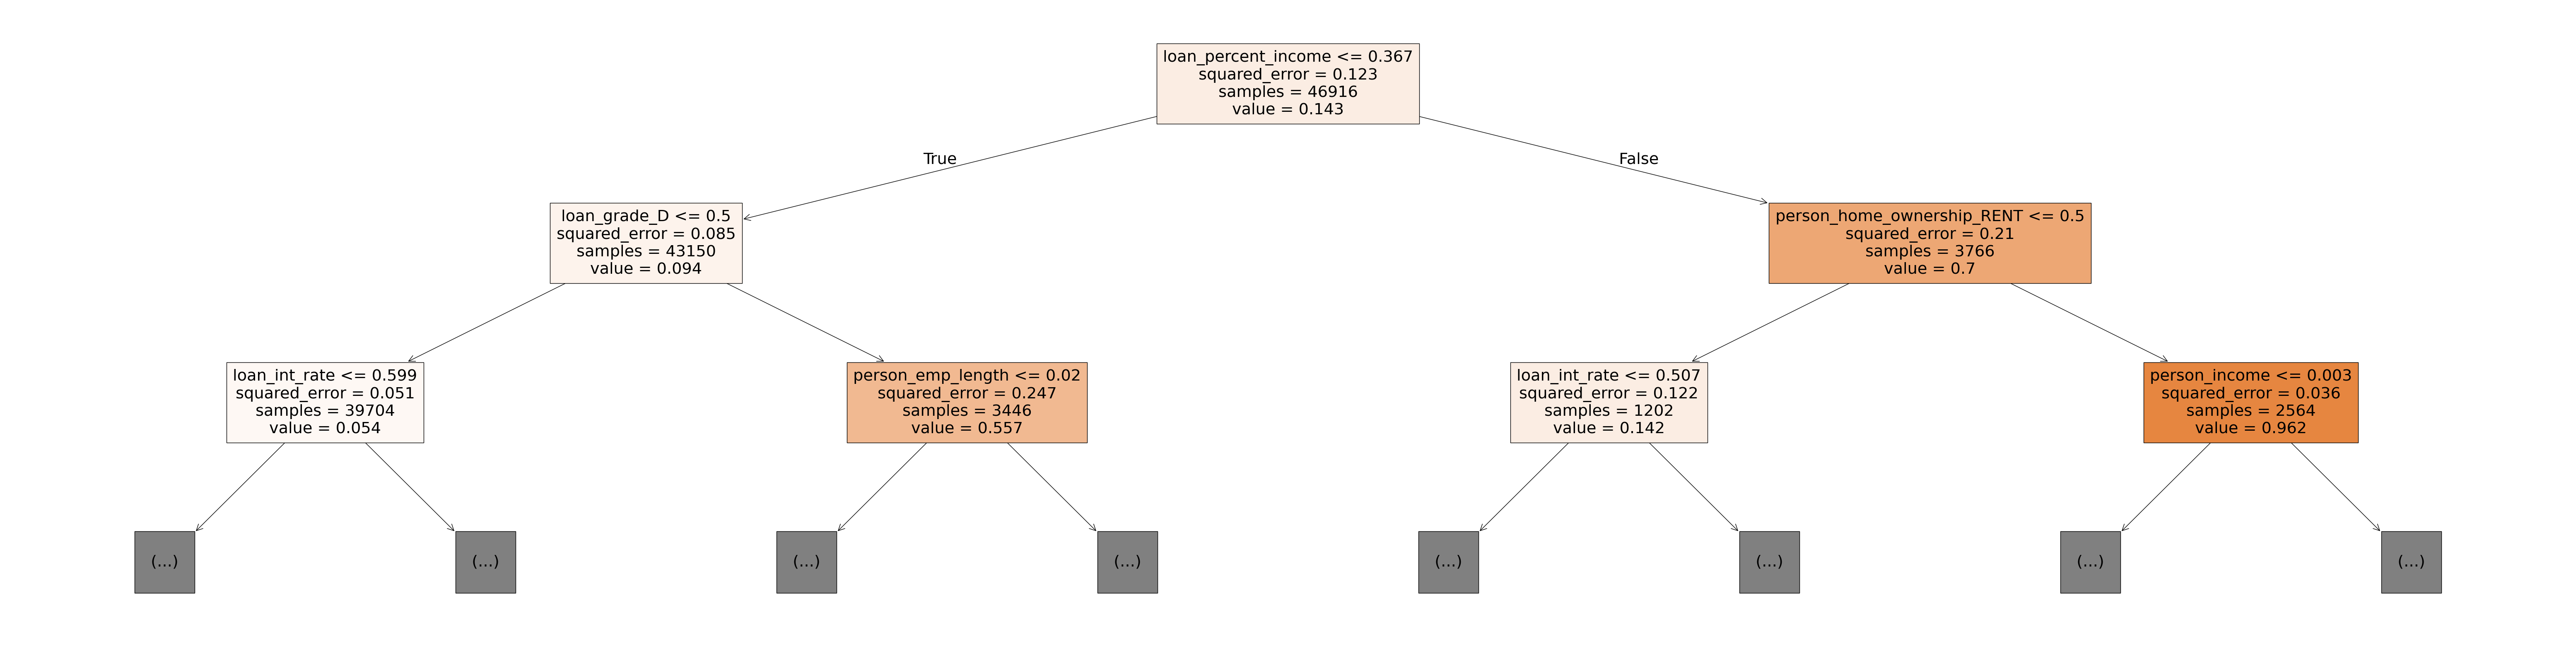

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names= X_train.columns , max_depth =2 , filled=True)

In [ ]:
model.tree_.max_depth

38

In [ ]:
tree_text = export_text(model, max_depth=10,feature_names =list(X_train.columns))
print(tree_text[:5000])

|--- loan_percent_income <= 0.37
|   |--- loan_grade_D <= 0.50
|   |   |--- loan_int_rate <= 0.60
|   |   |   |--- person_income <= 0.02
|   |   |   |   |--- loan_intent_HOMEIMPROVEMENT <= 0.50
|   |   |   |   |   |--- person_income <= 0.01
|   |   |   |   |   |   |--- loan_percent_income <= 0.19
|   |   |   |   |   |   |   |--- loan_percent_income <= 0.05
|   |   |   |   |   |   |   |   |--- loan_intent_PERSONAL <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |--- loan_intent_PERSONAL >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- loan_percent_income >  0.05
|   |   |   |   |   |   |   |   |--- loan_int_rate <= 0.35
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |--- loan_int_rate >  0.35
|   |   |   |   |   |   |   |   |   |--- loan_int_rate <= 0.36
|   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |   |--- lo

# Feature Importance
 Based on the squared error computations, a `decision tree` assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [ ]:
model.feature_importances_

array([4.01956291e-02, 9.52423781e-02, 6.37599905e-02, 3.32291748e-02,
       9.03961249e-02, 2.59540802e-01, 3.08908835e-02, 5.10559237e-03,
       7.24918075e-04, 6.54453119e-03, 1.22144176e-01, 3.22627900e-02,
       6.90015662e-03, 1.36951699e-02, 3.49134329e-02, 4.49377781e-03,
       3.11081546e-03, 1.03276725e-03, 2.75224365e-03, 1.60788337e-03,
       1.40119559e-01, 4.66799769e-03, 3.37898437e-04, 1.48562672e-04,
       3.15104518e-03, 3.03170054e-03])

In [ ]:
importance_df = pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending =False )

In [ ]:
importance_df.head(10)

,feature,importance
5,loan_percent_income,0.259541
20,loan_grade_D,0.140120
10,person_home_ownership_RENT,0.122144
1,person_income,0.095242
4,loan_int_rate,0.090396
2,person_emp_length,0.063760
0,person_age,0.040196
14,loan_intent_MEDICAL,0.034913
3,loan_amnt,0.033229
11,loan_intent_DEBTCONSOLIDATION,0.032263


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

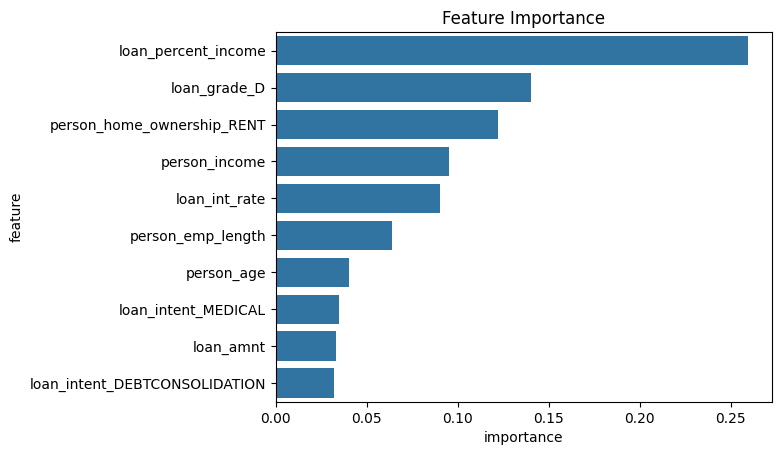

In [ ]:
plt.title('Feature Importance')
sns.barplot(data =importance_df.head(10),x = 'importance',y='feature')

# Hyperparameter Tuning and Overfitting
As we have seen that `training score is 100% and val_score is 27%` this lead to over fitting. So, In  order to `reduce overfitting` we will `tune hyperparameters` to reduce overfitting

Optimize the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# def parameter grid
param_grid = {
    'max_depth':[20,25,35],
    'min_samples_split':[15,20,40],
    'min_samples_leaf':[1,15,440]
}
# initialize GridSearchCV
grid_search =GridSearchCV(DecisionTreeRegressor(random_state=42),param_grid,cv=10)

# Fit the GridSearch
grid_search.fit(X_train,train_target)

# Best Parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters : {grid_search.best_estimator_}")

# Evaluate tune model
val_pred_tune = best_model.predict(X_val)
val_mae_tune = mean_absolute_error(val_target, val_pred_tune)
print(f"Tune validation MAE: {val_mae_tune}" )

Best Parameters : DecisionTreeRegressor(max_depth=20, min_samples_leaf=15, min_samples_split=40,
                      random_state=42)
Tune validation MAE: 0.08193429274149082


In [ ]:
sub_df = pd.DataFrame({
    'id': submission_df['id'],  # 'id' is now the correct key
    'loan_status': best_model.predict(X_test)  # Your model's predictions
})

# Save the submission dataframe to a CSV file
sub_df.to_csv('submission.csv', index=False)

In [ ]:
grid_search.score(X_train,train_target)

0.7000864860494868

In [ ]:
grid_search.score(X_val,val_target)

0.6246190522395789

AttributeError: 'DecisionTreeRegressor' object has no attribute 'classes_'

[Text(0.7908202166332624, 0.9761904761904762, 'loan_percent_income <= 0.367\nsquared_error = 0.123\nsamples = 46916\nvalue = 0.143'),
 Text(0.6505446965425159, 0.9285714285714286, 'loan_grade_D <= 0.5\nsquared_error = 0.085\nsamples = 43150\nvalue = 0.094'),
 Text(0.7206824565878891, 0.9523809523809523, 'True  '),
 Text(0.5127222464881731, 0.8809523809523809, 'loan_int_rate <= 0.599\nsquared_error = 0.051\nsamples = 39704\nvalue = 0.054'),
 Text(0.32948338602047494, 0.8333333333333334, 'person_income <= 0.016\nsquared_error = 0.043\nsamples = 39047\nvalue = 0.045'),
 Text(0.1089820376776365, 0.7857142857142857, 'loan_intent_HOMEIMPROVEMENT <= 0.5\nsquared_error = 0.113\nsamples = 4196\nvalue = 0.13'),
 Text(0.05491246727748691, 0.7380952380952381, 'person_income <= 0.008\nsquared_error = 0.095\nsamples = 3983\nvalue = 0.106'),
 Text(0.007946896035901272, 0.6904761904761905, 'loan_percent_income <= 0.187\nsquared_error = 0.232\nsamples = 180\nvalue = 0.367'),
 Text(0.004955123410620793,

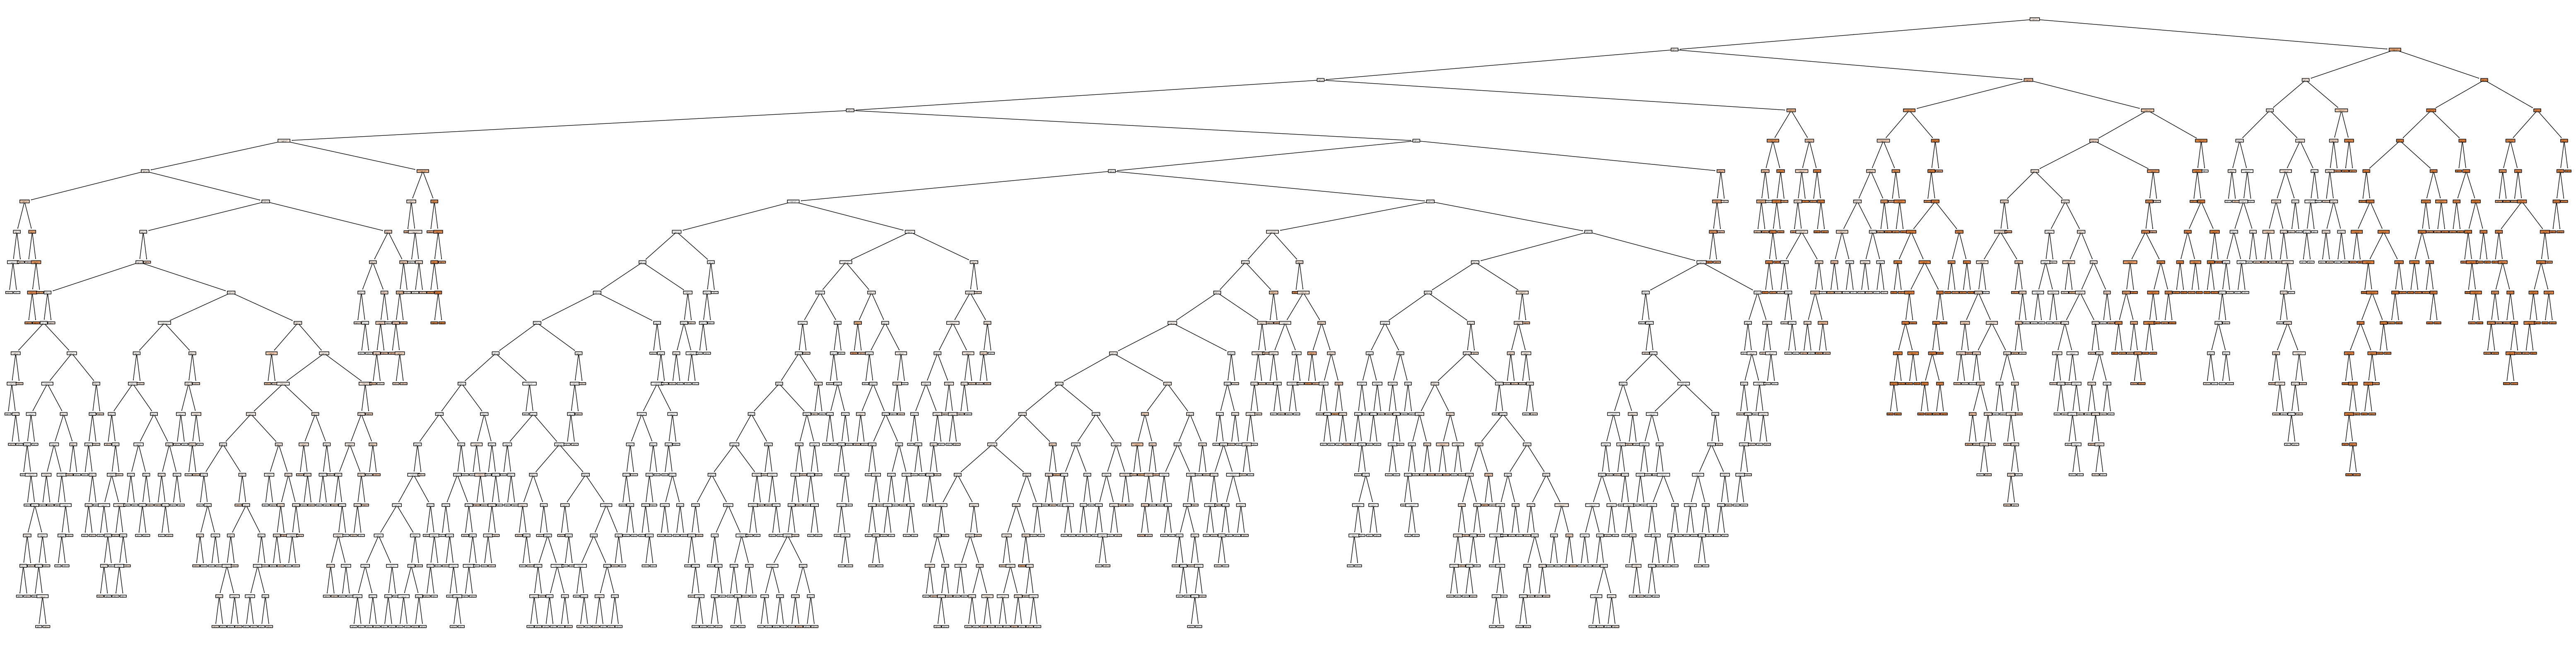

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(best_model,feature_names=X_train.columns,filled=True,rounded=True)

In [ ]:
print(export_text(best_model,feature_names =list(X_train.columns)))

|--- loan_percent_income <= 0.37
|   |--- loan_grade_D <= 0.50
|   |   |--- loan_int_rate <= 0.60
|   |   |   |--- person_income <= 0.02
|   |   |   |   |--- loan_intent_HOMEIMPROVEMENT <= 0.50
|   |   |   |   |   |--- person_income <= 0.01
|   |   |   |   |   |   |--- loan_percent_income <= 0.19
|   |   |   |   |   |   |   |--- loan_amnt <= 0.05
|   |   |   |   |   |   |   |   |--- cb_person_cred_hist_length <= 0.02
|   |   |   |   |   |   |   |   |   |--- value: [0.08]
|   |   |   |   |   |   |   |   |--- cb_person_cred_hist_length >  0.02
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- loan_amnt >  0.05
|   |   |   |   |   |   |   |   |--- value: [0.24]
|   |   |   |   |   |   |--- loan_percent_income >  0.19
|   |   |   |   |   |   |   |--- loan_int_rate <= 0.30
|   |   |   |   |   |   |   |   |--- value: [0.19]
|   |   |   |   |   |   |   |--- loan_int_rate >  0.30
|   |   |   |   |   |   |   |   |--- loan_percent_income <= 0.30
|   |   |   

let's experiment with different depths

In [ ]:
def max_depth_error(md):
  model =GridSearchCV(DecisionTreeRegressor(random_state=42),param_grid,cv=10)
  model.fit(X_train,train_target)
  train_acc = 1 - model.score(X_train,train_target)
  val_acc = 1 - model.score(X_val,val_target)

  return {"Max depth": md,"Training error":train_acc,"Validation Error":val_acc}


In [ ]:
error_df = pd.DataFrame([max_depth_error (md) for md in range(1,21)])

In [ ]:
error_df

,Max depth,Training error,Validation Error
0,1,0.299914,0.375381
1,2,0.299914,0.375381
2,3,0.299914,0.375381
3,4,0.299914,0.375381
4,5,0.299914,0.375381
5,6,0.299914,0.375381
6,7,0.299914,0.375381
7,8,0.299914,0.375381
8,9,0.299914,0.375381
9,10,0.299914,0.375381


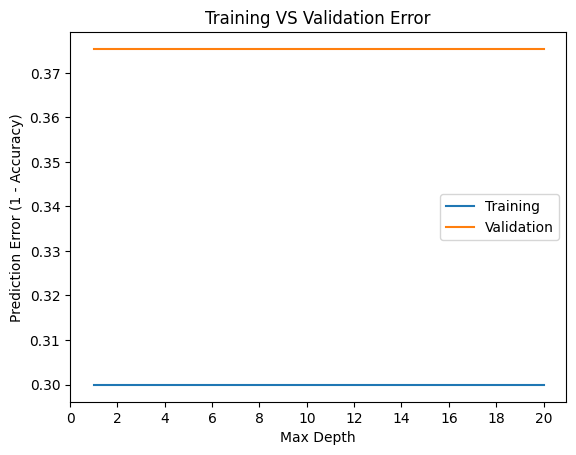

In [ ]:
plt.figure()
plt.plot(error_df['Max depth'],error_df['Training error'])
plt.plot(error_df['Max depth'],error_df['Validation Error'])
plt.title('Training VS Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training','Validation'])


In [ ]:
model =GridSearchCV(DecisionTreeRegressor(random_state=42,max_depth = 5),param_grid,cv=10).fit(X_train,train_target)
model.score(X_val,val_target)

0.6246190522395789

# Max leaf nodes

In [ ]:
model =GridSearchCV(DecisionTreeRegressor(random_state=42,max_leaf_nodes=100),param_grid)
model.fit(X_train,train_target)

GridSearchCV(estimator=DecisionTreeRegressor(max_leaf_nodes=100,
                                             random_state=42),
             param_grid={'max_depth': [20, 25, 35],
                         'min_samples_leaf': [1, 15, 440],
                         'min_samples_split': [15, 20, 40]})

In [ ]:
model.score(X_train,train_target)

0.6629443898926295

AttributeError: 'GridSearchCV' object has no attribute 'tree_'

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the DecisionTreeRegressor model
regressor = DecisionTreeRegressor()
regressor.fit(X_train, train_target)

# Now export the tree structure
model_text = export_text(regressor, feature_names=list(X_train.columns))

# Print the first 3000 characters
print(model_text[:3000])


|--- loan_percent_income <= 0.37
|   |--- loan_grade_D <= 0.50
|   |   |--- loan_int_rate <= 0.60
|   |   |   |--- person_income <= 0.02
|   |   |   |   |--- loan_intent_HOMEIMPROVEMENT <= 0.50
|   |   |   |   |   |--- person_income <= 0.01
|   |   |   |   |   |   |--- loan_percent_income <= 0.19
|   |   |   |   |   |   |   |--- loan_percent_income <= 0.05
|   |   |   |   |   |   |   |   |--- person_emp_length <= 0.02
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |--- person_emp_length >  0.02
|   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- loan_percent_income >  0.05
|   |   |   |   |   |   |   |   |--- loan_int_rate <= 0.35
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |--- loan_int_rate >  0.35
|   |   |   |   |   |   |   |   |   |--- loan_int_rate <= 0.36
|   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |   |--- loan_int

# Train a Random Forest
The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

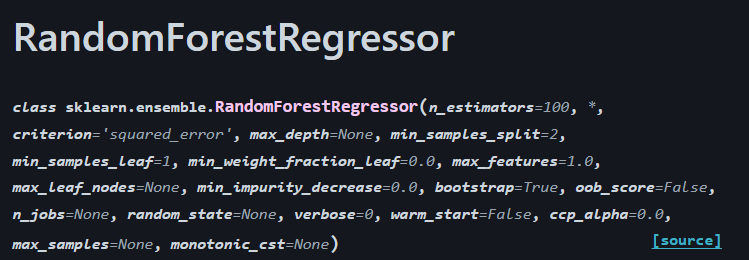

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_jobs=-1,random_state=42, n_estimators=3080, max_features=28, max_depth=25,min_samples_leaf=20,bootstrap=True)

In [ ]:
model.fit(X_train,train_target)

RandomForestRegressor(max_depth=25, max_features=28, min_samples_leaf=20,
                      n_estimators=3080, n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train, train_target)

0.699747884867002

In [ ]:
model.score(X_val,  val_target)

0.650747251354703

In [ ]:
model.predict(X_test)

array([0.91845238, 0.01236955, 0.69940476, ..., 0.01267705, 0.39246032,
       0.96309524])

In [ ]:
submission_rf_3 = pd.DataFrame({
    'id':submission_df['id'],
    'loan_status':model.predict(X_test)
})
submission_rf_3.to_csv('submission_rf3.csv',index=False)

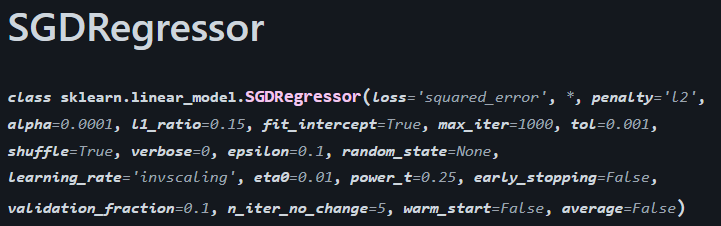

In [ ]:
from xgboost import XGBRegressor


In [ ]:
xgb_model= XGBRegressor(n_jobs=-1,random_state=50,n_estimators=800,min_samples_split=2000,
                    learning_rate=0.1,max_depth=5,colsample_bytree=0.95, reg_alpha =0.5)

In [ ]:
xgb_model.fit(X_train,train_target)

In [ ]:
xgb_model.score(X_train ,train_target)

0.7782855033874512

In [ ]:
xgb_model.score(X_val,val_target)

0.6624176502227783

In [ ]:
pred = xgb_model.predict(X_test)
pred

array([ 1.1271552 ,  0.03998614,  0.7074771 , ..., -0.04223607,
        0.07549956,  0.97024924], dtype=float32)

In [ ]:
xgb_sub_2 = pd.DataFrame({
    'id': submission_df['id'],
    'loan_status' :pred
})
xgb_sub_2.to_csv('xgb_submission495.csv',index=False)

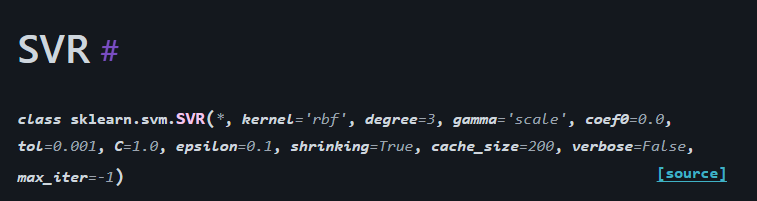

In [ ]:
from sklearn.svm import SVR

In [ ]:
modelsvr = SVR(kernel="poly", C=10, gamma=0.01, degree=1, epsilon=0.01, coef0=1)

In [ ]:
modelsvr.fit(X_train, train_target)

SVR(C=10, coef0=1, degree=1, epsilon=0.01, gamma=0.01, kernel='poly')

In [ ]:
modelsvr.score(X_train, train_target)

0.5156107461002631

In [ ]:
modelsvr.score(X_val, val_target)

0.030650033814608735

In [ ]:
pred = modelsvr.predict(X_test)

In [ ]:
svr_sub_2 = pd.DataFrame({
    'id': submission_df['id'],
    'loan_status' :pred
})
svr_sub_2.to_csv('svr_submission1.csv',index=False)